# Data sources:
https://finances.worldbank.org/Loans-and-Credits/IBRD-Statement-Of-Loans-Historical-Data/zucq-nrc3  
https://finances.worldbank.org/Loans-and-Credits/IBRD-Statement-of-Loans-Latest-Available-Snapshot/sfv5-tf7p

In [1]:
#Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from matplotlib.dates import YearLocator

%matplotlib inline

In [2]:
# Loading data

pd.set_option('display.max_rows', None)
df = pd.read_csv('IBRD_Statement_of_Loans_-_Latest_Available_Snapshot.csv')
df2 = pd.read_csv('IBRD_Statement_Of_Loans_-_Historical_Data.csv', low_memory=False)
cdf = pd.concat([df, df2], ignore_index=True)
cdf = cdf.reset_index(drop=True)

In [3]:
cdf.head()

,End of Period,Loan Number,Region,Country Code,Country,Borrower,Guarantor Country Code,Guarantor,Loan Type,Loan Status,...,Due 3rd Party,Loans Held,First Repayment Date,Last Repayment Date,Agreement Signing Date,Board Approval Date,Effective Date (Most Recent),Closed Date (Most Recent),Last Disbursement Date,Project Name
0,02/28/2023 12:00:00 AM,IBRD00010,EUROPE AND CENTRAL ASIA,FR,France,CREDIT NATIONAL,FR,France,NPL,Fully Repaid,...,0.0,0.0,11/01/1952 12:00:00 AM,05/01/1977 12:00:00 AM,05/09/1947 12:00:00 AM,05/09/1947 12:00:00 AM,06/09/1947 12:00:00 AM,12/31/1947 12:00:00 AM,NaN,NaN
1,02/28/2023 12:00:00 AM,IBRD00020,EUROPE AND CENTRAL ASIA,NL,Netherlands,NaN,NaN,NaN,NPL,Fully Repaid,...,0.0,0.0,04/01/1952 12:00:00 AM,10/01/1972 12:00:00 AM,08/07/1947 12:00:00 AM,08/07/1947 12:00:00 AM,09/11/1947 12:00:00 AM,03/31/1948 12:00:00 AM,NaN,NaN
2,02/28/2023 12:00:00 AM,IBRD00021,EUROPE AND CENTRAL ASIA,NL,Netherlands,NaN,NaN,NaN,NPL,Fully Repaid,...,0.0,0.0,04/01/1953 12:00:00 AM,04/01/1954 12:00:00 AM,05/25/1948 12:00:00 AM,08/07/1947 12:00:00 AM,06/01/1948 12:00:00 AM,06/30/1948 12:00:00 AM,NaN,NaN
3,02/28/2023 12:00:00 AM,IBRD00030,EUROPE AND CENTRAL ASIA,DK,Denmark,NaN,NaN,NaN,NPL,Fully Repaid,...,0.0,0.0,02/01/1953 12:00:00 AM,08/01/1972 12:00:00 AM,08/22/1947 12:00:00 AM,08/22/1947 12:00:00 AM,10/17/1947 12:00:00 AM,03/31/1949 12:00:00 AM,NaN,NaN
4,02/28/2023 12:00:00 AM,IBRD00040,EUROPE AND CENTRAL ASIA,LU,Luxembourg,NaN,NaN,NaN,NPL,Fully Repaid,...,0.0,0.0,07/15/1949 12:00:00 AM,07/15/1972 12:00:00 AM,08/28/1947 12:00:00 AM,08/28/1947 12:00:00 AM,10/24/1947 12:00:00 AM,03/31/1949 12:00:00 AM,NaN,NaN


In [4]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1196501 entries, 0 to 1196500
Data columns (total 34 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   End of Period                 1196501 non-null  object 
 1   Loan Number                   1196501 non-null  object 
 2   Region                        1196501 non-null  object 
 3   Country Code                  1196211 non-null  object 
 4   Country                       1196501 non-null  object 
 5   Borrower                      1188177 non-null  object 
 6   Guarantor Country Code        1151400 non-null  object 
 7   Guarantor                     1125022 non-null  object 
 8   Loan Type                     1196501 non-null  object 
 9   Loan Status                   1196501 non-null  object 
 10  Interest Rate                 1167128 non-null  float64
 11  Currency of Commitment        0 non-null        float64
 12  Project ID                  

In [5]:
# removing unnecesary columns

del cdf['Loan Number']
del cdf['Country Code']
del cdf['Guarantor Country Code']
del cdf['Project ID']
del cdf['Project Name']
del cdf['Effective Date (Most Recent)']
del cdf['Closed Date (Most Recent)']
del cdf['First Repayment Date']
del cdf['Last Repayment Date']
del cdf['Board Approval Date']
del cdf['Borrower']
del cdf['Guarantor']
del cdf['Last Disbursement Date']
del cdf['End of Period']
del cdf['Currency of Commitment']


In [6]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1196501 entries, 0 to 1196500
Data columns (total 19 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Region                     1196501 non-null  object 
 1   Country                    1196501 non-null  object 
 2   Loan Type                  1196501 non-null  object 
 3   Loan Status                1196501 non-null  object 
 4   Interest Rate              1167128 non-null  float64
 5   Original Principal Amount  1196501 non-null  float64
 6   Cancelled Amount           1196501 non-null  float64
 7   Undisbursed Amount         1196501 non-null  float64
 8   Disbursed Amount           1196501 non-null  float64
 9   Repaid to IBRD             1196501 non-null  float64
 10  Due to IBRD                1196501 non-null  float64
 11  Exchange Adjustment        1196501 non-null  float64
 12  Borrower's Obligation      1196501 non-null  float64
 13  Sold 3rd Par

In [7]:
# removing nulls 

cdf = cdf.dropna(axis=0)

In [51]:
# changing data types

cdf['Agreement Signing Date'] = pd.to_datetime(cdf['Agreement Signing Date'])

In [9]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 996264 entries, 8956 to 1196500
Data columns (total 19 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Region                     996264 non-null  object        
 1   Country                    996264 non-null  object        
 2   Loan Type                  996264 non-null  object        
 3   Loan Status                996264 non-null  object        
 4   Interest Rate              996264 non-null  float64       
 5   Original Principal Amount  996264 non-null  float64       
 6   Cancelled Amount           996264 non-null  float64       
 7   Undisbursed Amount         996264 non-null  float64       
 8   Disbursed Amount           996264 non-null  float64       
 9   Repaid to IBRD             996264 non-null  float64       
 10  Due to IBRD                996264 non-null  float64       
 11  Exchange Adjustment        996264 non-null  float64  

In [10]:
cdf.Region.unique()              

array(['EUROPE AND CENTRAL ASIA', 'LATIN AMERICA AND CARIBBEAN',
       'SOUTH ASIA', 'MIDDLE EAST AND NORTH AFRICA',
       'EAST ASIA AND PACIFIC', 'EASTERN AND SOUTHERN AFRICA',
       'WESTERN AND CENTRAL AFRICA', 'AFRICA EAST', 'AFRICA',
       'AFRICA WEST', 'Eastern and Southern Africa',
       'Western and Central Africa'], dtype=object)

In [11]:
# Changing region names

cdf.loc[cdf['Region'].str.contains('Africa', case=False), 'Region'] = 'AFRICA'

In [12]:
cdf.to_csv('IBRD.csv')

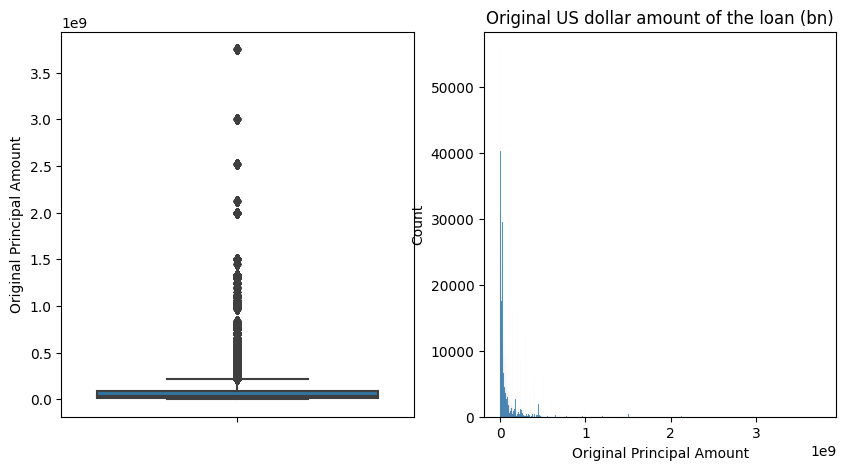

In [13]:
# plotting data

fig, axes = plt.subplots(1, 2, figsize=(10,5))
axes[1].set_title('Original US dollar amount of the loan (bn)')
sns.boxplot(data=cdf, y='Original Principal Amount', ax=axes[0])
sns.histplot(data=cdf, x='Original Principal Amount', ax=axes[1])

plt.show()

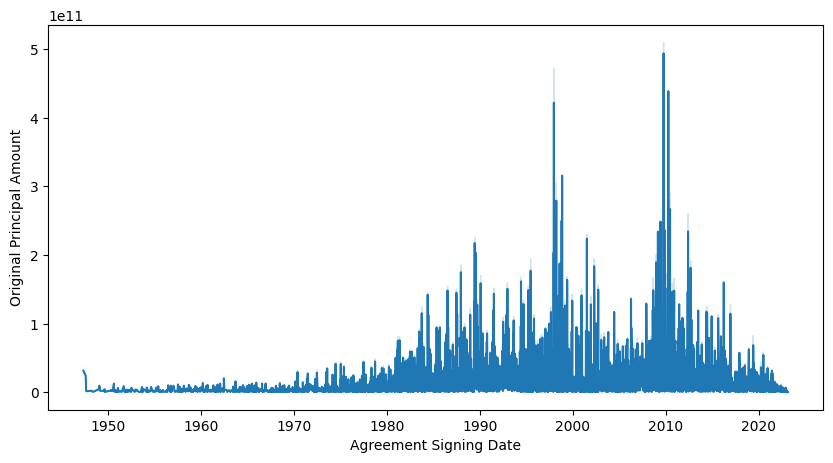

In [14]:
plt.figure(figsize=(10,5))
ax = sns.lineplot(data=cdf, y='Original Principal Amount', x='Agreement Signing Date', estimator = 'sum')
ax.xaxis.set_major_locator(YearLocator(10))
plt.show()

In [15]:
# Most of the loans are within 1 billion USD. There are peaks in 1998, 2009 and 2010.

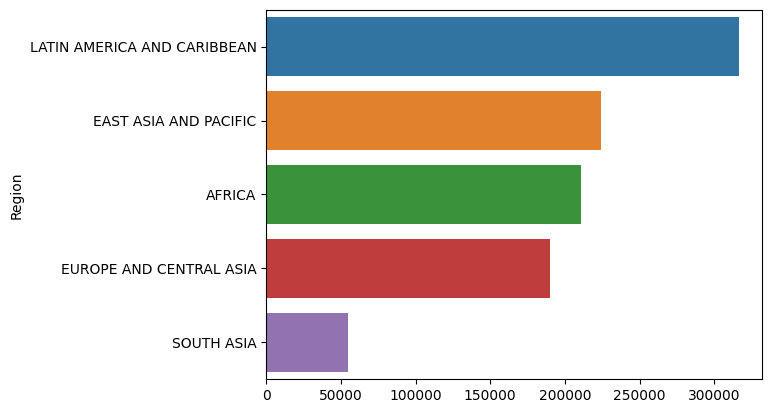

In [16]:
# plotting data

top_10 = cdf['Region'].value_counts().nlargest(10)
sorted_data = cdf[cdf['Region'].isin(top_10.index)]
ax = sns.barplot(x=top_10.values, y=top_10.index, order=top_10.index)

plt.show()

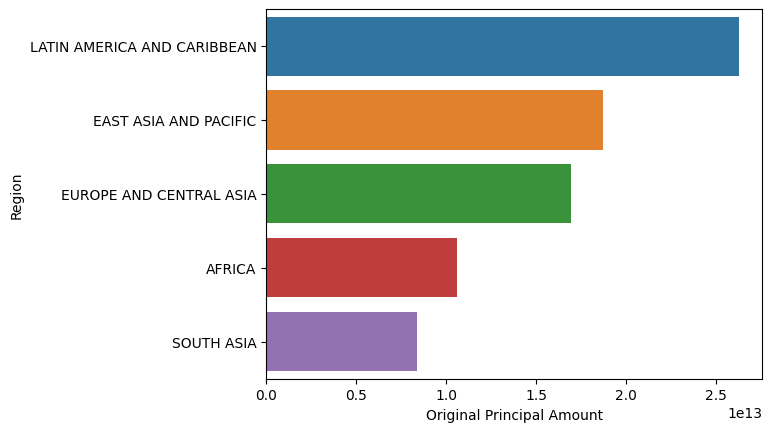

In [17]:
# plotting data

sorted_data_sum = cdf.groupby('Region')['Original Principal Amount'].sum().sort_values(ascending=False)

sns.barplot(x=sorted_data_sum.values, y=sorted_data_sum.index)
plt.xlabel('Original Principal Amount')
plt.ylabel('Region')

plt.show()

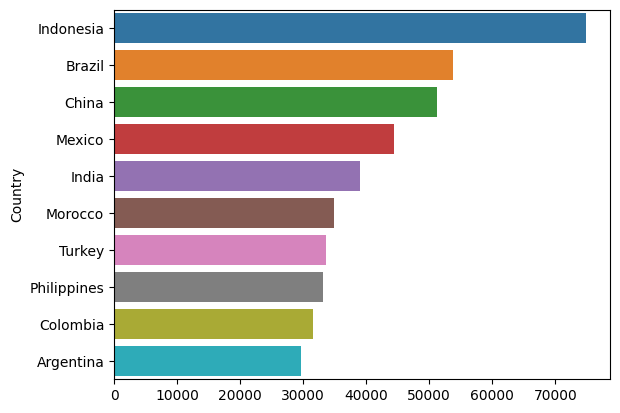

In [18]:
# plotting data

top_10 = cdf['Country'].value_counts().nlargest(10)
sorted_data = cdf[cdf['Country'].isin(top_10.index)]
ax = sns.barplot(x=top_10.values, y=top_10.index, order=top_10.index)

plt.show()

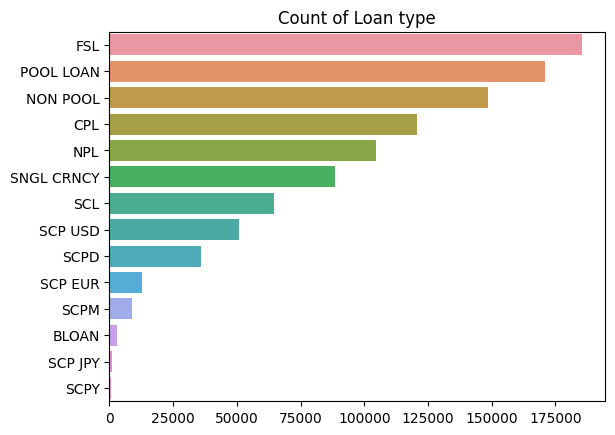

In [31]:
# plotting data

top_15 = cdf['Loan Type'].value_counts().nlargest(15)
sorted_data = cdf[cdf['Loan Type'].isin(top_15.index)]
ax = sns.barplot(x=top_15.values, y=top_15.index, order=top_15.index).set_title('Count of Loan type')
plt.ylabel('')

plt.show()

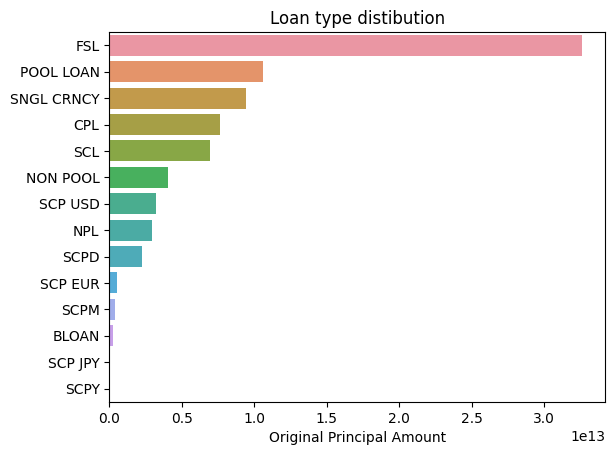

In [36]:
# plotting data

top_15 = cdf.groupby('Loan Type')['Original Principal Amount'].sum().nlargest(15)
sorted_data = cdf[cdf['Loan Type'].isin(top_15.index)]
ax = sns.barplot(x='Original Principal Amount', y='Loan Type', data=sorted_data, estimator=sum, order=top_15.index, errorbar=None).set_title('Loan type distibution')
plt.ylabel('')

plt.show()

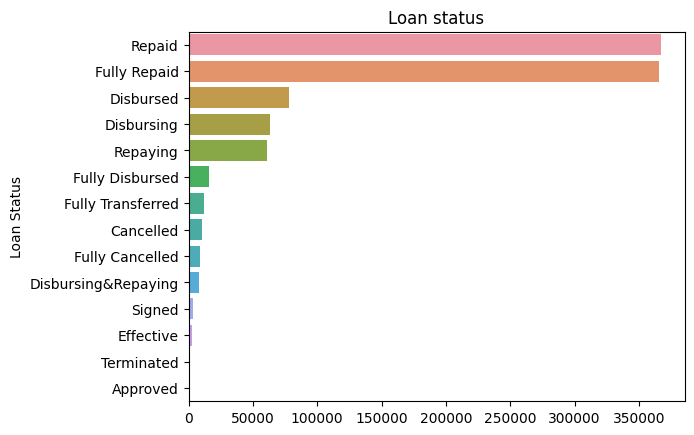

In [38]:
# plotting data

top_15 = cdf['Loan Status'].value_counts().nlargest(15)
sorted_data = cdf[cdf['Loan Status'].isin(top_15.index)]
ax = sns.barplot(x=top_15.values, y=top_15.index, order=top_15.index).set_title('Loan status')

plt.show()

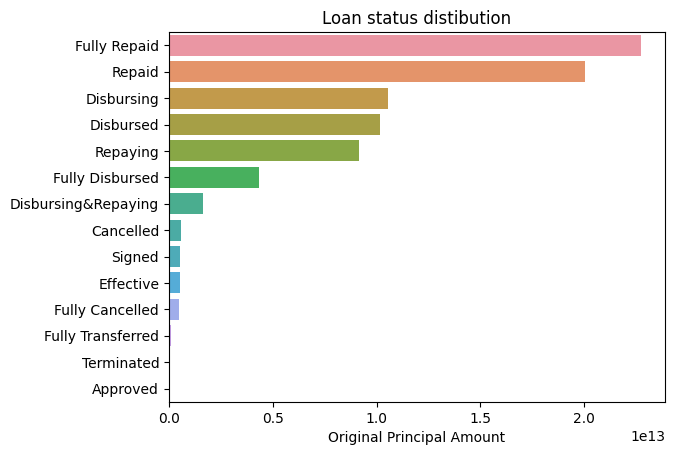

In [39]:
# plotting data

top_15 = cdf.groupby('Loan Status')['Original Principal Amount'].sum().nlargest(15)
sorted_data = cdf[cdf['Loan Status'].isin(top_15.index)]
ax = sns.barplot(x='Original Principal Amount', y='Loan Status', data=sorted_data, estimator=sum, order=top_15.index, errorbar=None).set_title('Loan status distibution')
plt.ylabel('')

plt.show()

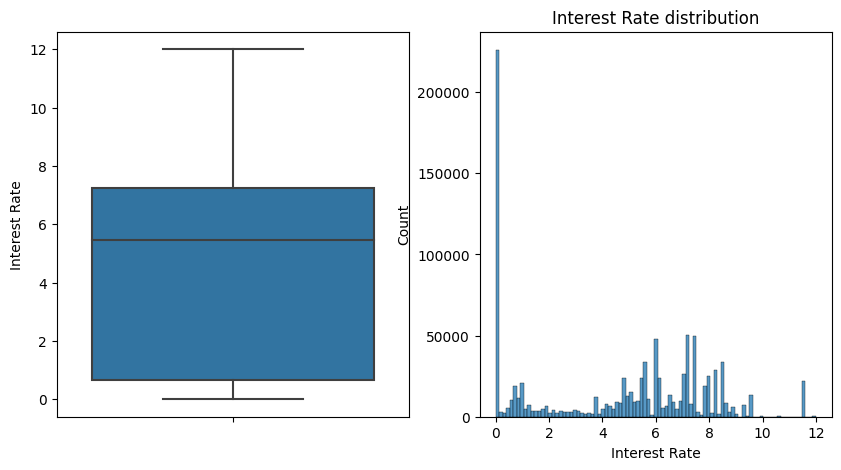

In [21]:
# plotting data

fig, axes = plt.subplots(1, 2, figsize=(10,5))
axes[1].set_title('Interest Rate distribution')
sns.boxplot(data=cdf, y='Interest Rate', ax=axes[0])
sns.histplot(data=cdf, x='Interest Rate', ax=axes[1])

plt.show()

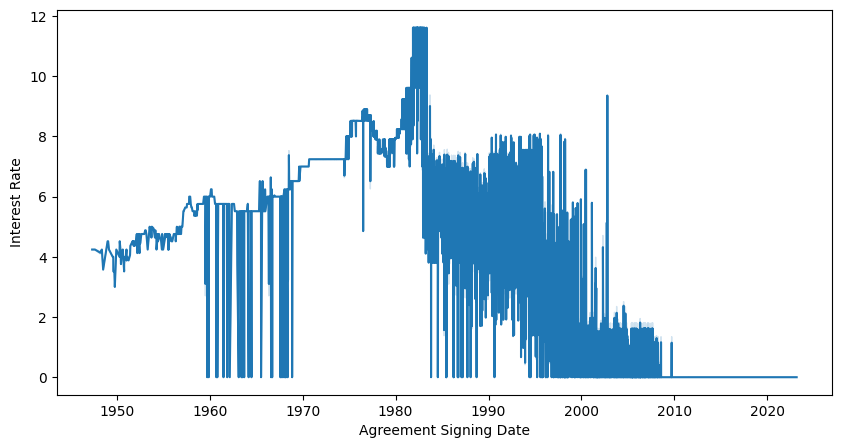

In [22]:
plt.figure(figsize=(10,5))
ax = sns.lineplot(data=cdf, y='Interest Rate', x='Agreement Signing Date', estimator = 'mean')
ax.xaxis.set_major_locator(YearLocator(10))
plt.show()

In [23]:
# There is a peak in 1982 and starting from 2010 rate is 0%

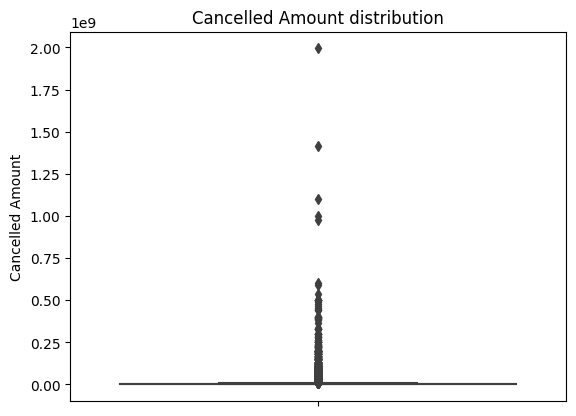

In [24]:
# plotting data

sns.boxplot(data=df, y='Cancelled Amount').set_title('Cancelled Amount distribution')

plt.show()

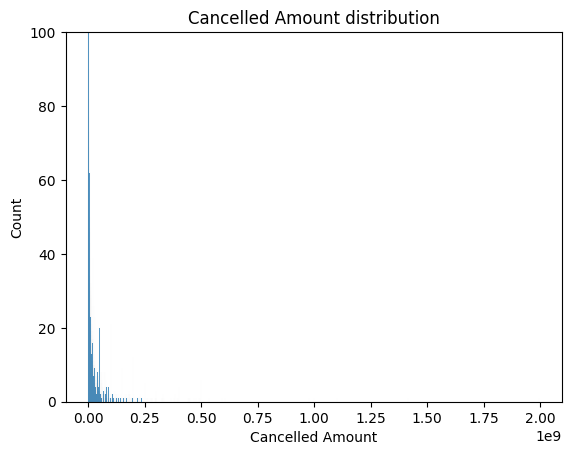

In [25]:
fig, ax = plt.subplots()
sns.histplot(data=df, x='Cancelled Amount', ax=ax).set_title('Cancelled Amount distribution')
ax.set_ylim([0, 100]) # Set the y-axis limits here
plt.show()

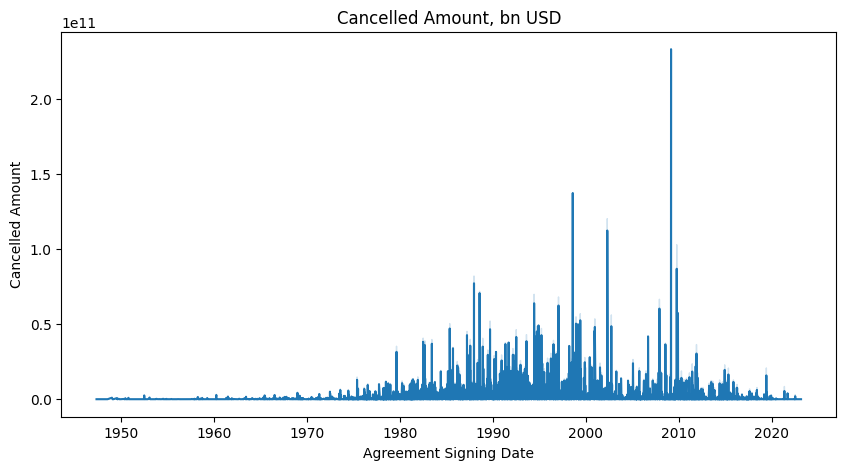

In [18]:
plt.figure(figsize=(10,5))
ax = sns.lineplot(data=cdf, y='Cancelled Amount', x='Agreement Signing Date', estimator = 'sum')
ax.set_title('Cancelled Amount, bn USD')
ax.xaxis.set_major_locator(YearLocator(10))
plt.show()

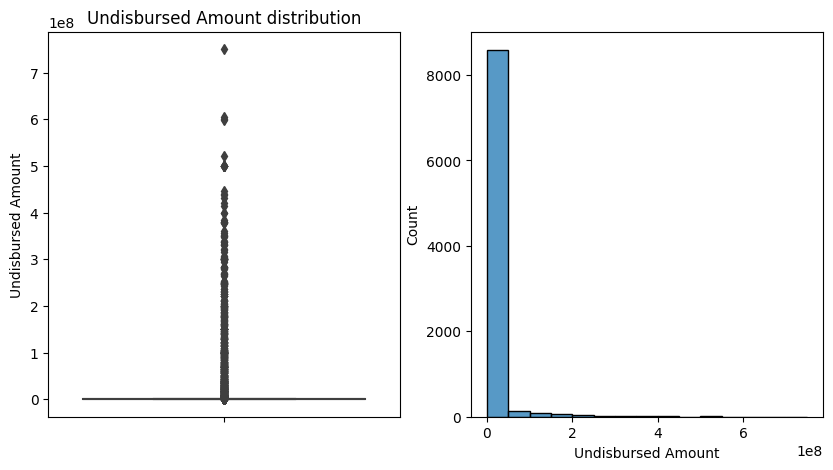

In [28]:
# plotting data

fig, axes = plt.subplots(1, 2, figsize=(10,5))
axes[0].set_title('Undisbursed Amount distribution')
sns.boxplot(data=df, y='Undisbursed Amount', ax=axes[0])
sns.histplot(data=df, x='Undisbursed Amount', ax=axes[1])

plt.show()

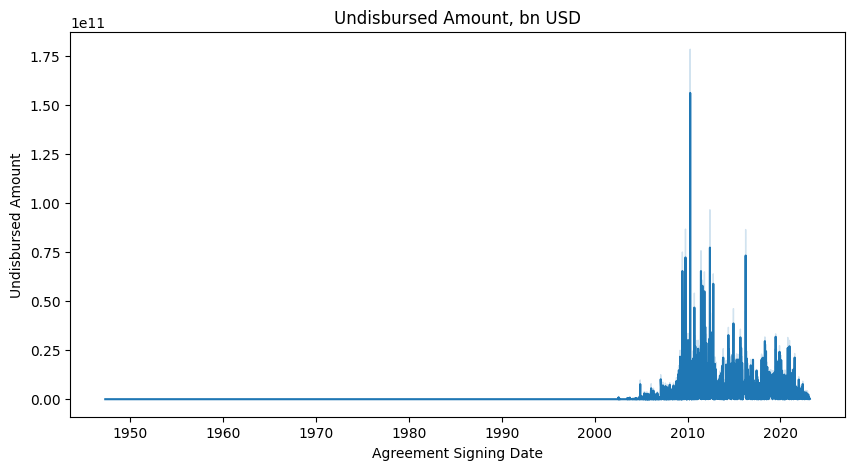

In [20]:
plt.figure(figsize=(10,5))
ax = sns.lineplot(data=cdf, y='Undisbursed Amount', x='Agreement Signing Date', estimator = 'sum')
ax.set_title('Undisbursed Amount, bn USD')
ax.xaxis.set_major_locator(YearLocator(10))
plt.show()

In [ ]:
# There is a peak in 2010

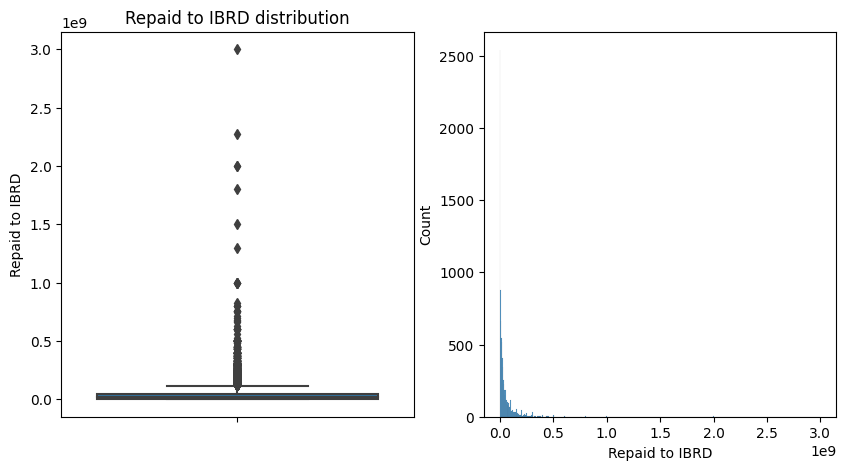

In [21]:
# plotting data

fig, axes = plt.subplots(1, 2, figsize=(10,5))
axes[0].set_title('Repaid to IBRD distribution')
sns.boxplot(data=df, y='Repaid to IBRD', ax=axes[0])
sns.histplot(data=df, x='Repaid to IBRD', ax=axes[1])

plt.show()

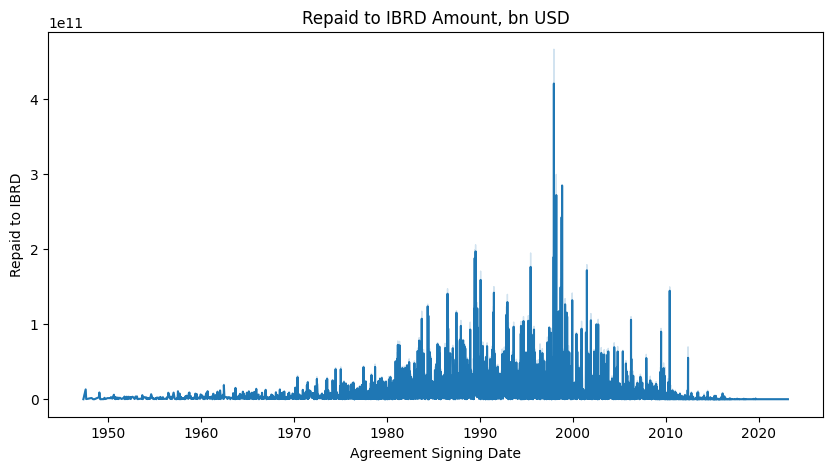

In [23]:
plt.figure(figsize=(10,5))
ax = sns.lineplot(data=cdf, y='Repaid to IBRD', x='Agreement Signing Date', estimator = 'sum')
ax.xaxis.set_major_locator(YearLocator(10))
ax.set_title('Repaid to IBRD Amount, bn USD')
plt.show()

In [ ]:
# There are peaks in 1998 and 2010

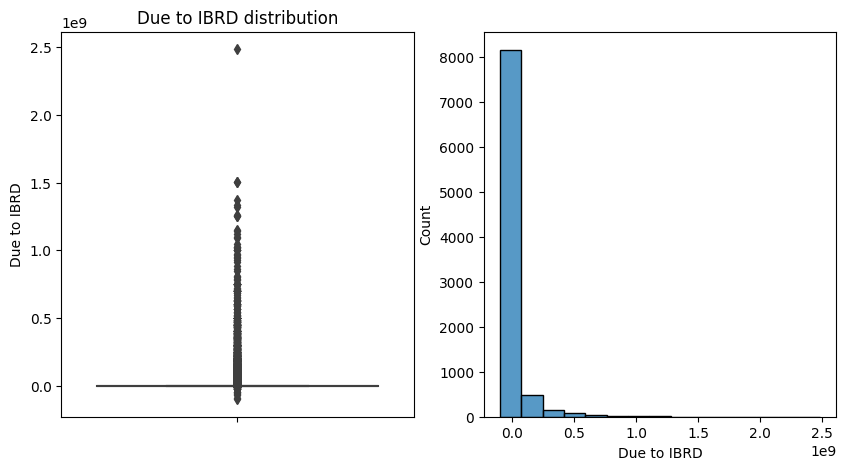

In [24]:
# plotting data

fig, axes = plt.subplots(1, 2, figsize=(10,5))
axes[0].set_title('Due to IBRD distribution')
sns.boxplot(data=df, y='Due to IBRD', ax=axes[0])
sns.histplot(data=df, x='Due to IBRD', ax=axes[1])

plt.show()

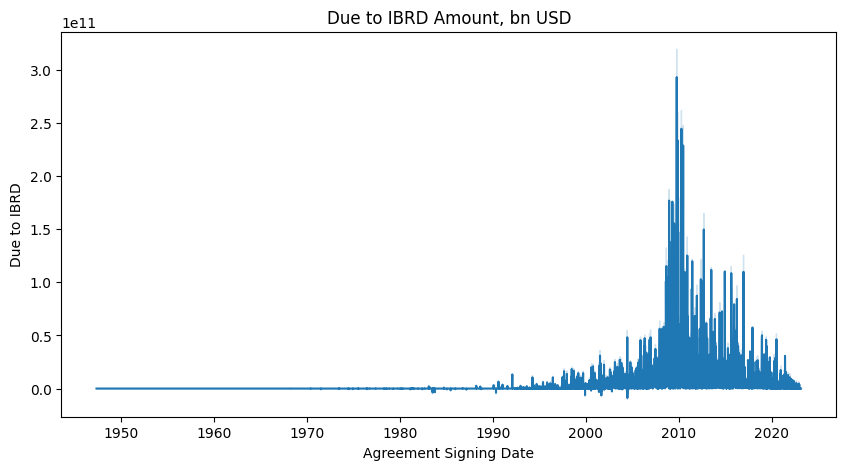

In [25]:
plt.figure(figsize=(10,5))
ax = sns.lineplot(data=cdf, y='Due to IBRD', x='Agreement Signing Date', estimator = 'sum')
ax.xaxis.set_major_locator(YearLocator(10))
ax.set_title('Due to IBRD Amount, bn USD')
plt.show()

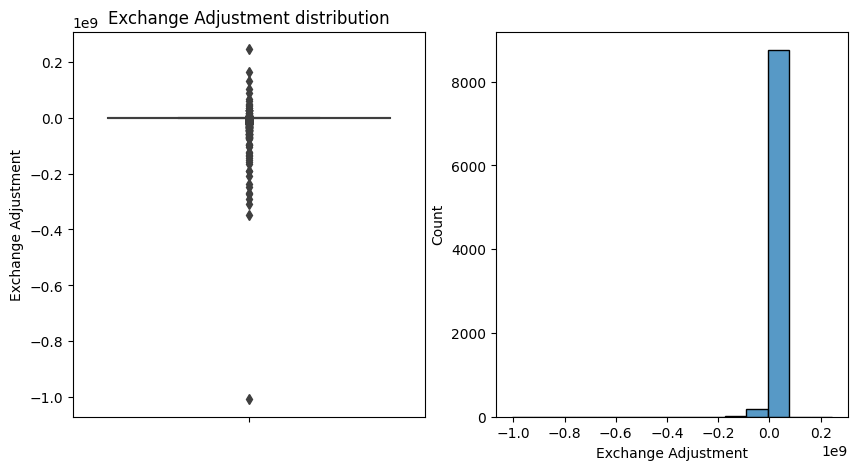

In [26]:
# plotting data

fig, axes = plt.subplots(1, 2, figsize=(10,5))
axes[0].set_title('Exchange Adjustment distribution')
sns.boxplot(data=df, y='Exchange Adjustment', ax=axes[0])
sns.histplot(data=df, x='Exchange Adjustment', ax=axes[1])

plt.show()

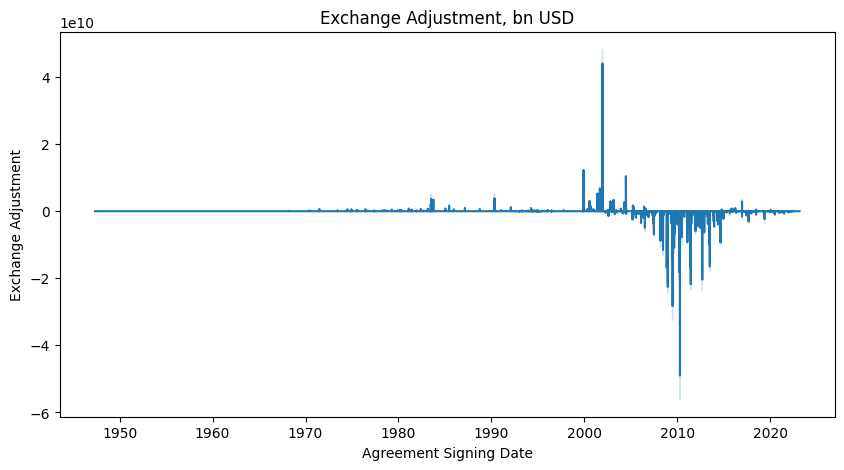

In [27]:
plt.figure(figsize=(10,5))
ax = sns.lineplot(data=cdf, y='Exchange Adjustment', x='Agreement Signing Date', estimator = 'sum')
ax.xaxis.set_major_locator(YearLocator(10))
ax.set_title('Exchange Adjustment, bn USD')
plt.show()

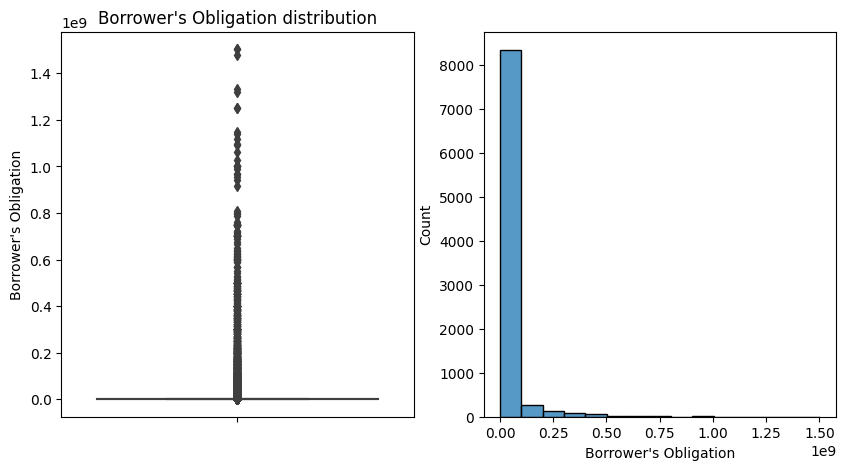

In [28]:
# plotting data

fig, axes = plt.subplots(1, 2, figsize=(10,5))
axes[0].set_title("Borrower's Obligation distribution")
sns.boxplot(data=df, y="Borrower's Obligation", ax=axes[0])
sns.histplot(data=df, x="Borrower's Obligation", ax=axes[1])

plt.show()

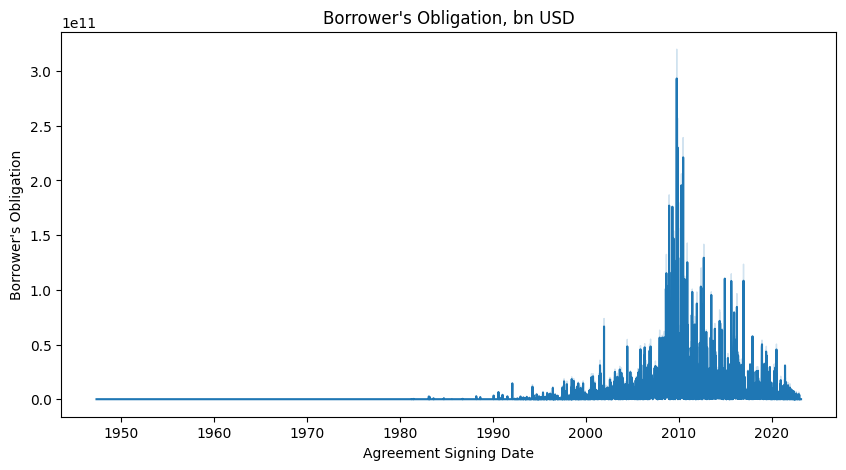

In [30]:
plt.figure(figsize=(10,5))
ax = sns.lineplot(data=cdf, y="Borrower's Obligation", x='Agreement Signing Date', estimator = 'sum')
ax.xaxis.set_major_locator(YearLocator(10))
ax.set_title("Borrower's Obligation, bn USD")
plt.show()

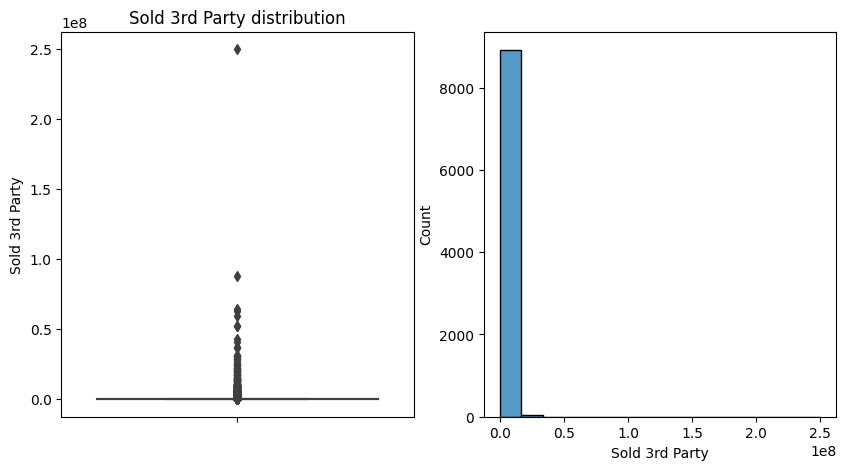

In [31]:
# plotting data

fig, axes = plt.subplots(1, 2, figsize=(10,5))
axes[0].set_title('Sold 3rd Party distribution')
sns.boxplot(data=df, y='Sold 3rd Party', ax=axes[0])
sns.histplot(data=df, x='Sold 3rd Party', ax=axes[1])

plt.show()

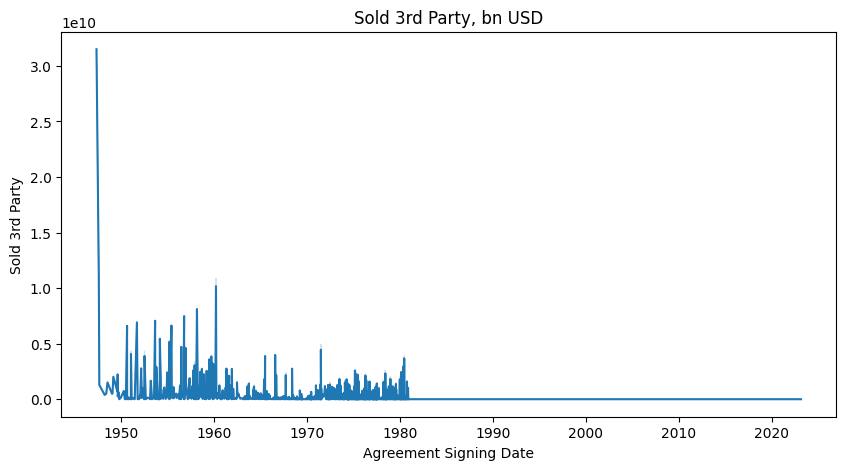

In [32]:
plt.figure(figsize=(10,5))
ax = sns.lineplot(data=cdf, y="Sold 3rd Party", x='Agreement Signing Date', estimator = 'sum')
ax.xaxis.set_major_locator(YearLocator(10))
ax.set_title('Sold 3rd Party, bn USD')
plt.show()

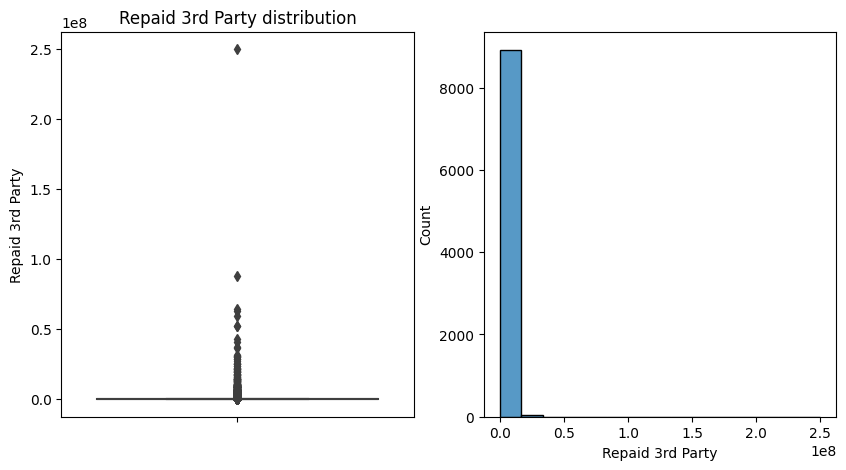

In [33]:
# plotting data

fig, axes = plt.subplots(1, 2, figsize=(10,5))
axes[0].set_title('Repaid 3rd Party distribution')
sns.boxplot(data=df, y='Repaid 3rd Party', ax=axes[0])
sns.histplot(data=df, x='Repaid 3rd Party', ax=axes[1])

plt.show()

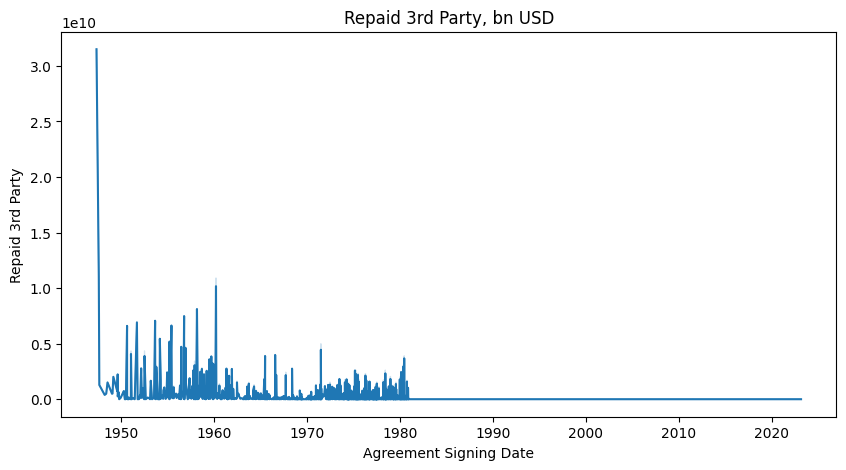

In [34]:
plt.figure(figsize=(10,5))
ax = sns.lineplot(data=cdf, y="Repaid 3rd Party", x='Agreement Signing Date', estimator = 'sum')
ax.xaxis.set_major_locator(YearLocator(10))
ax.set_title('Repaid 3rd Party, bn USD')
plt.show()

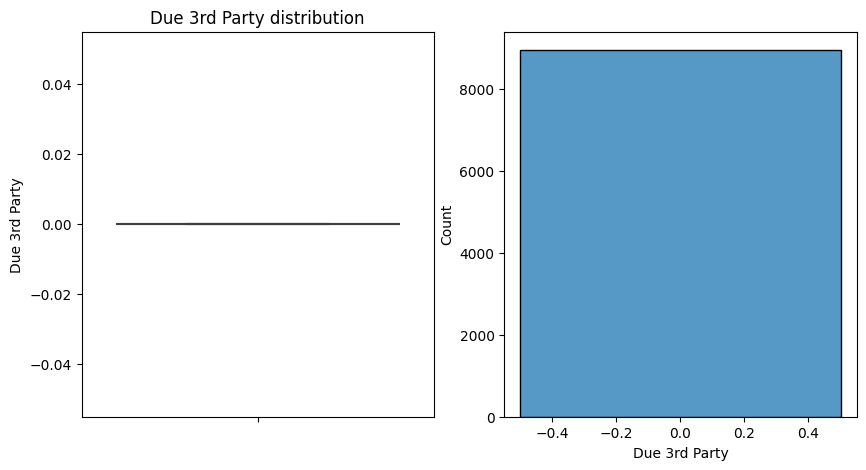

In [35]:
# plotting data

fig, axes = plt.subplots(1, 2, figsize=(10,5))
axes[0].set_title('Due 3rd Party distribution')
sns.boxplot(data=df, y='Due 3rd Party', ax=axes[0])
sns.histplot(data=df, x='Due 3rd Party', ax=axes[1])

plt.show()

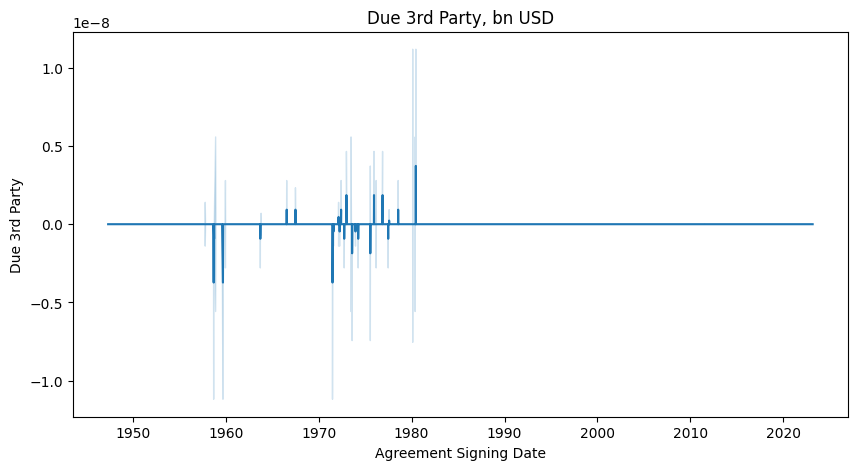

In [36]:
plt.figure(figsize=(10,5))
ax = sns.lineplot(data=cdf, y="Due 3rd Party", x='Agreement Signing Date', estimator = 'sum')
ax.xaxis.set_major_locator(YearLocator(10))
ax.set_title('Due 3rd Party, bn USD')
plt.show()

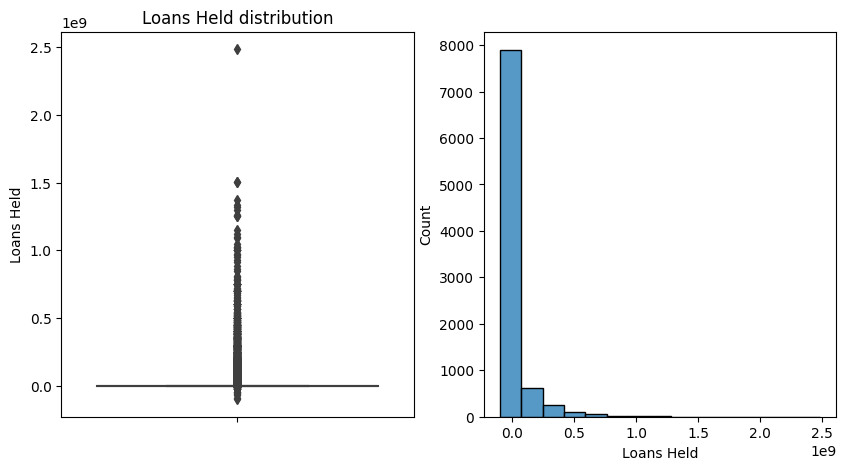

In [37]:
# plotting data

fig, axes = plt.subplots(1, 2, figsize=(10,5))
axes[0].set_title('Loans Held distribution')
sns.boxplot(data=df, y='Loans Held', ax=axes[0])
sns.histplot(data=df, x='Loans Held', ax=axes[1])

plt.show()

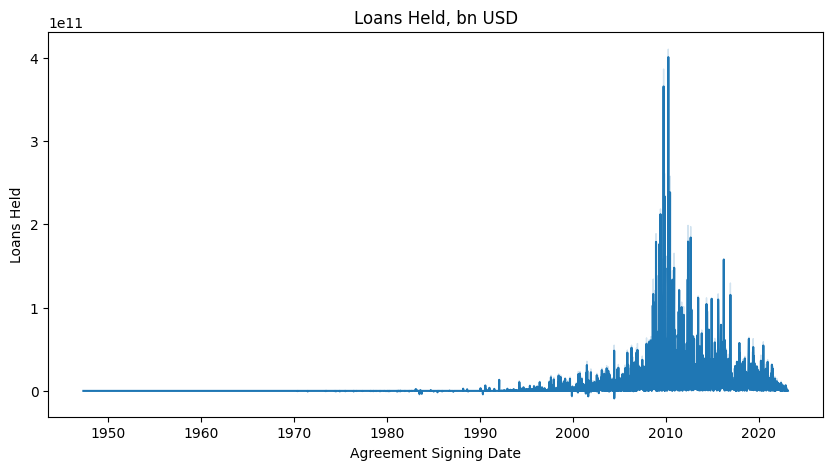

In [38]:
plt.figure(figsize=(10,5))
ax = sns.lineplot(data=cdf, y="Loans Held", x='Agreement Signing Date', estimator = 'sum')
ax.xaxis.set_major_locator(YearLocator(10))
ax.set_title('Loans Held, bn USD')
plt.show()

In [15]:
# checking correlation

columns = ['Interest Rate', 'Original Principal Amount', 'Cancelled Amount', 'Undisbursed Amount', 'Disbursed Amount', 'Repaid to IBRD', 'Due to IBRD', 'Exchange Adjustment', 'Borrower\'s Obligation', 'Sold 3rd Party', 'Repaid 3rd Party', 'Due 3rd Party', 'Loans Held']
corr_matrix = cdf[columns].corr()

# Display the correlation matrix
corr_matrix

,Interest Rate,Original Principal Amount,Cancelled Amount,Undisbursed Amount,Disbursed Amount,Repaid to IBRD,Due to IBRD,Exchange Adjustment,Borrower's Obligation,Sold 3rd Party,Repaid 3rd Party,Due 3rd Party,Loans Held
Interest Rate,1.000000,-0.284751,-0.068466,-0.188355,-0.236275,-0.043833,-0.286079,0.056142,-0.290808,0.053233,0.053233,-0.000083,-0.324112
Original Principal Amount,-0.284751,1.000000,0.308656,0.350422,0.910647,0.602920,0.682260,-0.264327,0.678938,-0.014578,-0.014578,-0.000067,0.731931
Cancelled Amount,-0.068466,0.308656,1.000000,-0.017245,0.052035,0.069160,0.007098,-0.010725,0.006170,-0.023989,-0.023989,0.000102,-0.001064
Undisbursed Amount,-0.188355,0.350422,-0.017245,1.000000,0.048820,-0.060268,0.124362,-0.051711,0.123361,-0.016506,-0.016506,0.000086,0.522275
Disbursed Amount,-0.236275,0.910647,0.052035,0.048820,1.000000,0.684903,0.727164,-0.279598,0.723861,-0.003206,-0.003206,-0.000147,0.645240
Repaid to IBRD,-0.043833,0.602920,0.069160,-0.060268,0.684903,1.000000,-0.000970,0.007911,-0.000122,-0.020381,-0.020381,-0.000160,-0.025868
Due to IBRD,-0.286079,0.682260,0.007098,0.124362,0.727164,-0.000970,1.000000,-0.391437,0.994682,-0.025842,-0.025842,0.000134,0.911108
Exchange Adjustment,0.056142,-0.264327,-0.010725,-0.051711,-0.279598,0.007911,-0.391437,1.000000,-0.294576,0.004509,0.004509,-0.000022,-0.357900
Borrower's Obligation,-0.290808,0.678938,0.006170,0.123361,0.723861,-0.000122,0.994682,-0.294576,1.000000,-0.026332,-0.026332,0.000137,0.906122
Sold 3rd Party,0.053233,-0.014578,-0.023989,-0.016506,-0.003206,-0.020381,-0.025842,0.004509,-0.026332,1.000000,1.000000,-0.004558,-0.029066


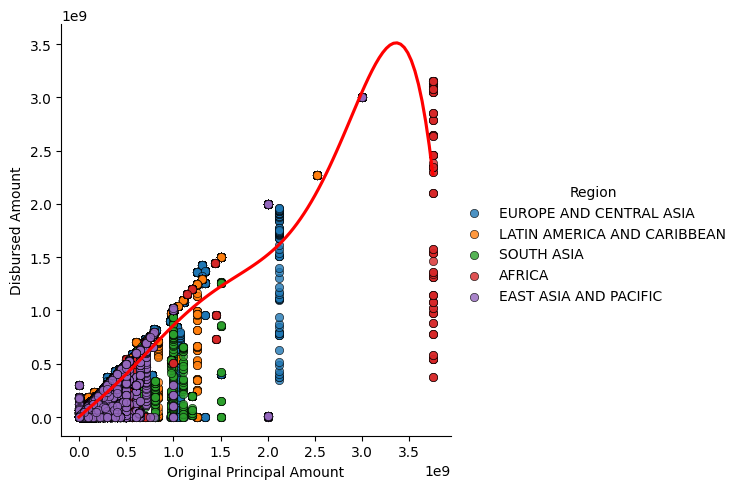

In [46]:
# plotting data

sns.lmplot(data = cdf, x = 'Original Principal Amount', y = 'Disbursed Amount', hue = 'Region', scatter_kws={'edgecolor':'black', 'linewidth':0.5}, fit_reg=False)
sns.regplot(data = cdf, x = 'Original Principal Amount', y = 'Disbursed Amount', order = 6, ci = None, scatter=False, color='r')

plt.show()

### There is a general trend of loans under 1.5 billion USD being repaid in full, but as the loan amount increases, there is a wider range of outcomes. This is particularly noticeable in the African region.

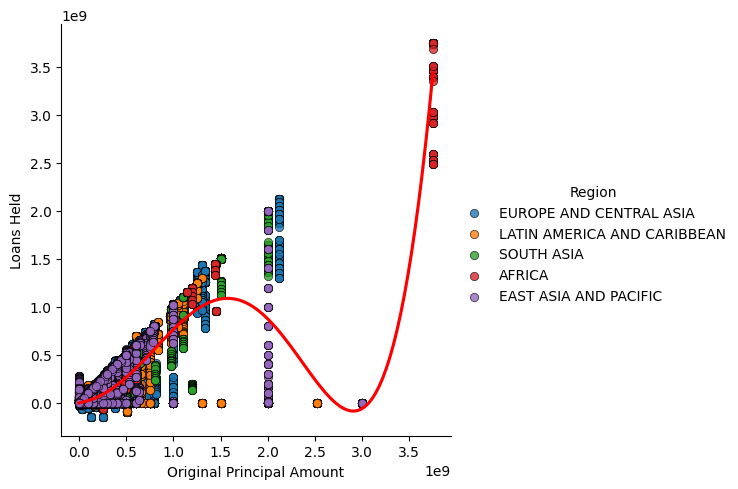

In [45]:
# plotting data

sns.lmplot(data = cdf, x = 'Original Principal Amount', y = 'Loans Held', hue = 'Region', scatter_kws={'edgecolor':'black', 'linewidth':0.5}, fit_reg=False)
sns.regplot(data = cdf, x = 'Original Principal Amount', y = 'Loans Held', order = 6, ci = None, scatter=False, color='r')

plt.show()

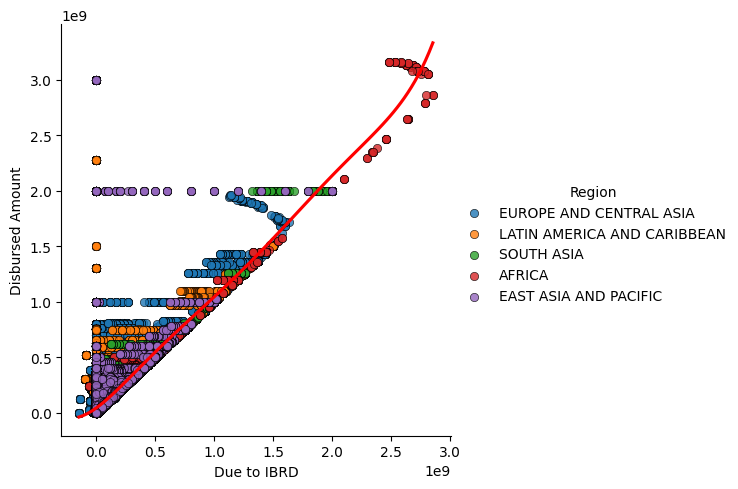

In [47]:
# plotting data

sns.lmplot(data = cdf, x = 'Due to IBRD', y = 'Disbursed Amount', hue = 'Region', scatter_kws={'edgecolor':'black', 'linewidth':0.5}, fit_reg=False)
sns.regplot(data = cdf, x = 'Due to IBRD', y = 'Disbursed Amount', order = 6, ci = None, scatter=False, color='r')

plt.show()

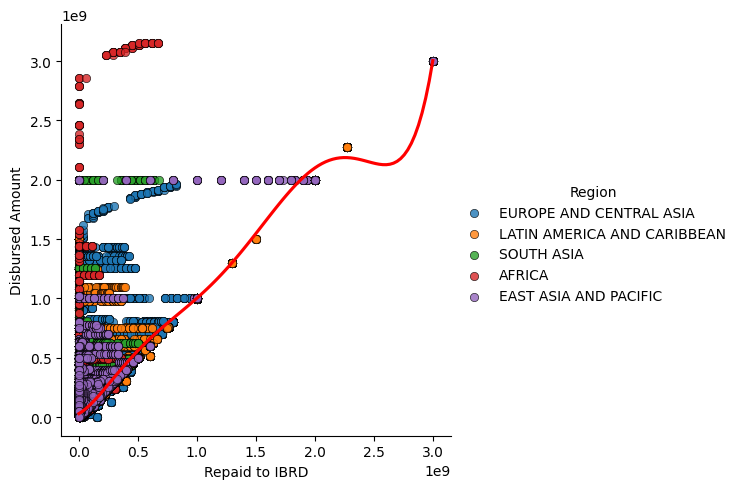

In [48]:
# plotting data

sns.lmplot(data = cdf, x = 'Repaid to IBRD', y = 'Disbursed Amount', hue = 'Region', scatter_kws={'edgecolor':'black', 'linewidth':0.5}, fit_reg=False)
sns.regplot(data = cdf, x = 'Repaid to IBRD', y = 'Disbursed Amount', order = 6, ci = None, scatter=False, color='r')

plt.show()

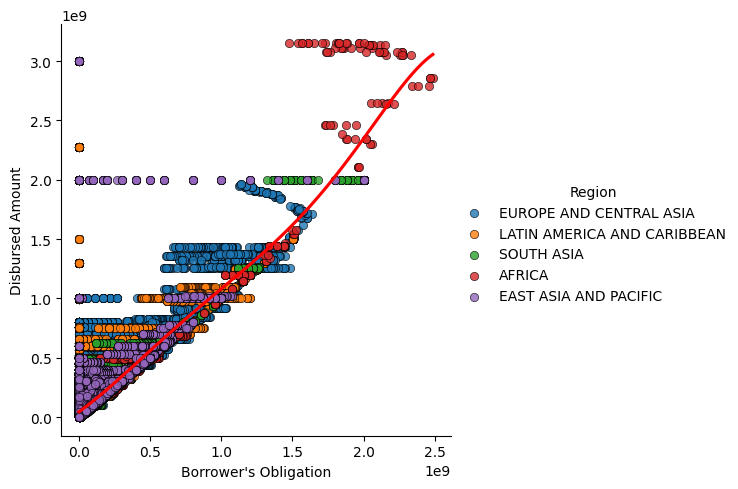

In [49]:
# plotting data

sns.lmplot(data = cdf, x = "Borrower's Obligation", y = 'Disbursed Amount', hue = 'Region', scatter_kws={'edgecolor':'black', 'linewidth':0.5}, fit_reg=False)
sns.regplot(data = cdf, x = "Borrower's Obligation", y = 'Disbursed Amount', order = 6, ci = None, scatter=False, color='r')

plt.show()

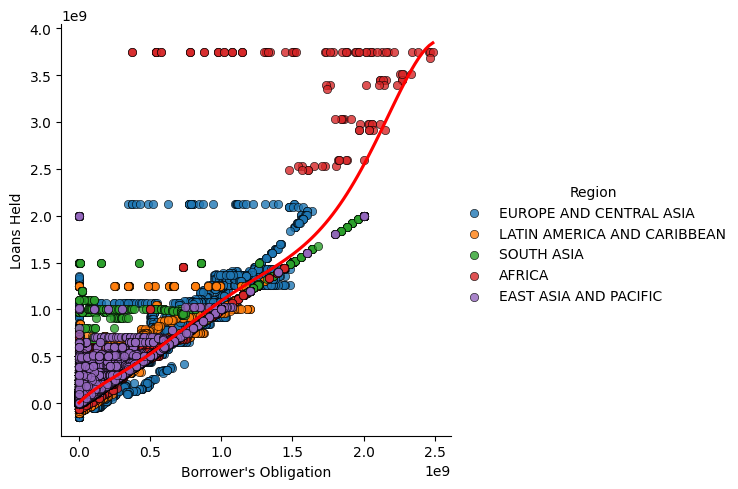

In [50]:
# plotting data

sns.lmplot(data = cdf, x = "Borrower's Obligation", y = 'Loans Held', hue = 'Region', scatter_kws={'edgecolor':'black', 'linewidth':0.5}, fit_reg=False)
sns.regplot(data = cdf, x = "Borrower's Obligation", y = 'Loans Held', order = 6, ci = None, scatter=False, color='r')

plt.show()